<a href="https://colab.research.google.com/github/Jiras-1996/DataRockie-Bootcamp-Project/blob/main/Project_Rise_and_Fall_of_Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Rise and Fall of Programming Languages

**Date**: 19 November 2023

**Author** : Jiras Adthsutanan (Jay)

**Language** : `Python Programming`

**Data Process** : `Data manipulation` `Data Visualization`

**Dataset** : `by_tag_year.csv`

**File Type** : `Comma-separated values`

## Step 01 : Dataset introduction :

How can we tell what programming languages and technologies are used by the most people? How about what languages are growing and which are shrinking, so that we can tell which are most worth investing time in?

One excellent source of data is [Stack Overflow](https://stackoverflow.com/), a programming question and answer site with more than 16 million questions on programming topics. By measuring the number of questions about each technology, we can get an approximate sense of how many people are using it. We're going to use open data from the [Stack Exchange Data Explorer](https://data.stackexchange.com/) to examine the relative popularity of languages like R, Python, Java and Javascript have changed over time.

Each Stack Overflow question has a tag, which marks a question to describe its topic or technology. For instance, there's a tag for languages like [R](https://stackoverflow.com/tags/r) or [Python](https://stackoverflow.com/tags/python), and for packages like [ggplot2](https://stackoverflow.com/questions/tagged/ggplot2) or [pandas](https://stackoverflow.com/questions/tagged/pandas).

<img src ='https://s3.amazonaws.com/assets.datacamp.com/production/project_435/img/tags.png'>

We'll be working with a dataset with one observation for each tag in each year. The dataset includes both the number of questions asked in that tag in that year, and the total number of questions asked in that year.

## Step 02 : Data Preparation and Exploration :

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import file
df = pd.read_csv('drive/MyDrive/dataset/by_tag_year.csv')

In [3]:
# Preview dataframe 5 first rows
df.head(10)

,year,tag,number,year_total
0,2008,.htaccess,54,58390
1,2008,.net,5910,58390
2,2008,.net-2.0,289,58390
3,2008,.net-3.5,319,58390
4,2008,.net-4.0,6,58390
5,2008,.net-assembly,3,58390
6,2008,.net-core,1,58390
7,2008,2d,42,58390
8,2008,32-bit,19,58390
9,2008,32bit-64bit,4,58390


`Column name detail:`
- Year -> year of collecting data
- Tag -> tags name
- Number -> number of posts by tags
- Year_total -> total post by tags in that year

In [4]:
# Shape of dataframe
df.shape

(40518, 4)

In [5]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40518 entries, 0 to 40517
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        40518 non-null  int64 
 1   tag         40496 non-null  object
 2   number      40518 non-null  int64 
 3   year_total  40518 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


## Step 03 : Data analysis and Visualization :

### Question 01 : Now in fraction format

This data has one observation for each pair of a tag and a year, showing the number of questions asked in that tag in that year and the total number of questions asked in that year. For instance, there were 54 questions asked about the .htaccess tag in 2008, out of a total of 58390 questions in that year.

Rather than just the counts, we're probably interested in a percentage: the fraction of questions that year that have that tag. So let's add that to the table.

In [6]:
# Create fraction format
df["fraction"] = df['number'] / df['year_total']

by_tag_year_fraction = df
by_tag_year_fraction

,year,tag,number,year_total,fraction
0,2008,.htaccess,54,58390,0.000925
1,2008,.net,5910,58390,0.101216
2,2008,.net-2.0,289,58390,0.004949
3,2008,.net-3.5,319,58390,0.005463
4,2008,.net-4.0,6,58390,0.000103
...,...,...,...,...,...
40513,2018,zlib,89,1085170,0.000082
40514,2018,zoom,196,1085170,0.000181
40515,2018,zsh,175,1085170,0.000161
40516,2018,zurb-foundation,182,1085170,0.000168


### Question 02 : Has Python & R been growing or shrinking?
So far we've been learning and using the Python & R programming language. Wouldn't we like to be sure it's a good investment for the future? Has it been keeping pace with other languages, or have people been switching out of it?

Let's look at whether the fraction of Stack Overflow questions that are about Python and R has been increasing or decreasing over time.

In [7]:
# Filter for Python and R tags
python_over_time = by_tag_year_fraction[by_tag_year_fraction['tag'] == 'python']
r_over_time = by_tag_year_fraction[by_tag_year_fraction['tag'] == 'r']

print(python_over_time)
print(r_over_time)

       year     tag  number  year_total  fraction
1794   2008  python    2080       58390  0.035623
4796   2009  python   12906      343868  0.037532
8105   2010  python   27098      694391  0.039024
11615  2011  python   42313     1200551  0.035245
15325  2012  python   64456     1645404  0.039173
19158  2013  python   96803     2060473  0.046981
23103  2014  python  116945     2164701  0.054024
27122  2015  python  137861     2219527  0.062113
31173  2016  python  159436     2226072  0.071622
35233  2017  python  203522     2305207  0.088288
39282  2018  python  107348     1085170  0.098923
       year tag  number  year_total  fraction
1821   2008   r       8       58390  0.000137
4830   2009   r     524      343868  0.001524
8141   2010   r    2270      694391  0.003269
11656  2011   r    5845     1200551  0.004869
15367  2012   r   12221     1645404  0.007427
19202  2013   r   22329     2060473  0.010837
23148  2014   r   31011     2164701  0.014326
27167  2015   r   40844     2219

### Question 03 : Visualizing change over time in Python & R
Rather than looking at the results in a table, we often want to create a visualization. Change over time is usually visualized with a line plot.

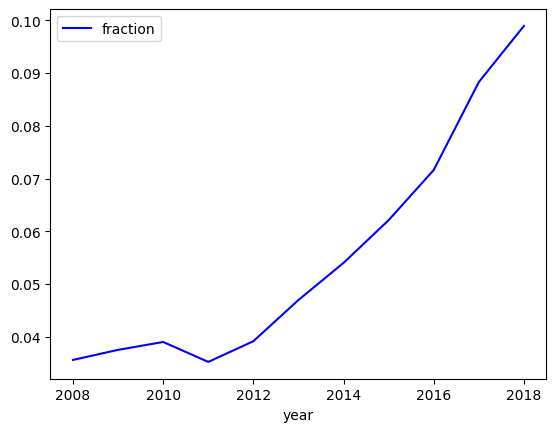

In [8]:
# Create a line plot of fraction over time
python_over_time[['year','fraction']]\
.plot(x = 'year', y = 'fraction', kind = "line", color = "blue");

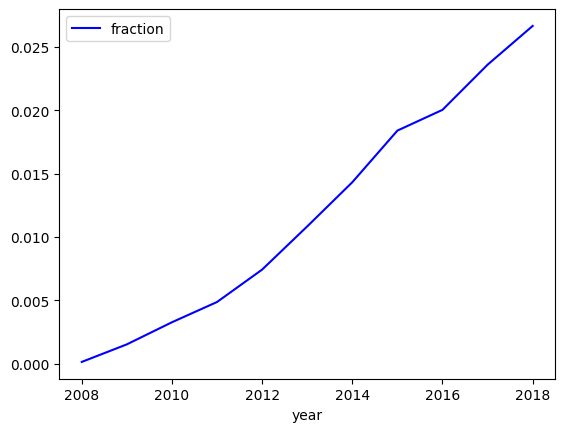

In [9]:
r_over_time[['year','fraction']]\
.plot(x = 'year', y = 'fraction', kind = "line", color = "blue");

### Question 04 : How about dplyr and ggplot2?

Based on that graph, it looks like R has been growing pretty fast in the last decade. Good thing we're practicing it now!

Besides R, two other interesting tags are dplyr and ggplot2, which we've already used in this analysis. They both also have Stack Overflow tags!

Instead of just looking at R, let's look at all three tags and their change over time. Are each of those tags increasing as a fraction of overall questions? Are any of them decreasing?

In [10]:
# Filter for those tags
r_selected_tags_over_time = by_tag_year_fraction[by_tag_year_fraction['tag'].isin(["r", "dplyr", "ggplot2"])]

r_selected_tags_over_time.sort_values(['tag', 'year'])

,year,tag,number,year_total,fraction
13664,2012,dplyr,3,1645404,1.823260e-06
17447,2013,dplyr,1,2060473,4.853255e-07
21347,2014,dplyr,550,2164701,2.540767e-04
25344,2015,dplyr,1499,2219527,6.753691e-04
29390,2016,dplyr,1981,2226072,8.899083e-04
33451,2017,dplyr,3418,2305207,1.482730e-03
37506,2018,dplyr,2092,1085170,1.927809e-03
3690,2009,ggplot2,33,343868,9.596706e-05
6922,2010,ggplot2,245,694391,3.528272e-04
10371,2011,ggplot2,547,1200551,4.556241e-04


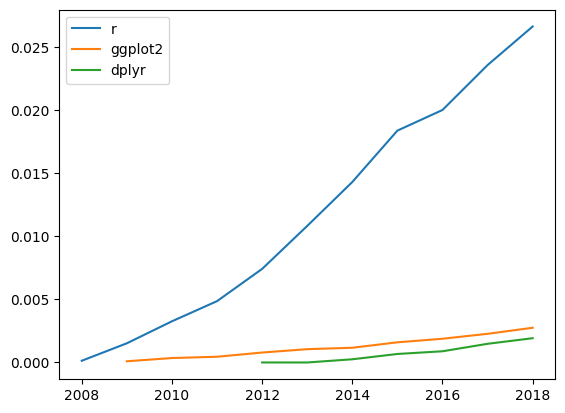

In [11]:
# Create 3 variables line chart
tag_set = set(r_selected_tags_over_time['tag'])

plt.figure()

for tag in tag_set:
    selected_data = r_selected_tags_over_time.loc[r_selected_tags_over_time['tag'] == tag]
    plt.plot(selected_data['year'], selected_data['fraction'], label= tag)

plt.legend()
plt.show()

### Question 05 : How about top 10 Python libraries?
Based on that graph, it looks like Python has been growing pretty fast in the last decade. Good thing we're practicing it now!

Besides Python top 10 libraries, which we've already used in this analysis. They both also have Stack Overflow tags!

Instead of just looking at Python, let's look at all top 10 libraries tags and their change over time. Are each of those tags increasing as a fraction of overall questions? Are any of them decreasing?

In [12]:
# Filter for top 10 Python libraries tags
python_selected_tags_over_time = by_tag_year_fraction[by_tag_year_fraction['tag']\
                                    .isin(["tensorflow", "scikit-learn", "numpy", "keras", "pytorch",\
                                           "lightgbm", "eli5", "scipy", "theano", "pandas"])]

python_selected_tags_over_time.sort_values(['tag', 'year'])

,year,tag,number,year_total,fraction
18337,2013,keras,1,2060473,4.853255e-07
26267,2015,keras,43,2219527,1.937350e-05
30317,2016,keras,870,2226072,3.908229e-04
34378,2017,keras,4438,2305207,1.925207e-03
38429,2018,keras,3489,1085170,3.215164e-03
1544,2008,numpy,12,58390,2.055146e-04
4505,2009,numpy,159,343868,4.623867e-04
7787,2010,numpy,524,694391,7.546181e-04
11285,2011,numpy,1198,1200551,9.978751e-04
14975,2012,numpy,2358,1645404,1.433083e-03


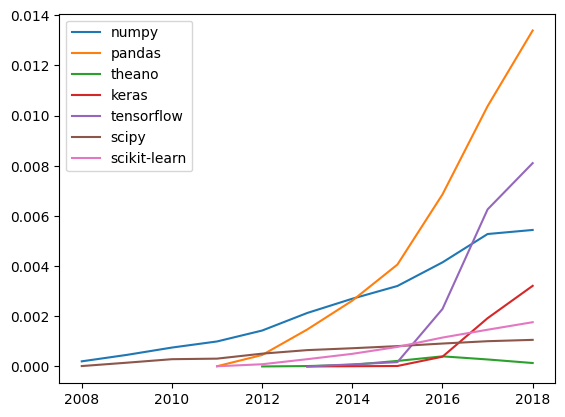

In [13]:
# Create top 10 Python libraries line chart
tag_set = set(python_selected_tags_over_time['tag'])

plt.figure()

for tag in tag_set:
    selected_data = python_selected_tags_over_time.loc[python_selected_tags_over_time['tag'] == tag]
    plt.plot(selected_data['year'], selected_data['fraction'], label= tag)

plt.legend()
plt.show()

- The graph shows that there are 7 libraries with results and 3 libraries without results, including pytorch, lightgbm, and eli5. Therefore, we can conclude that the three libraries without results were probably deployed after 2018.

### Question 06 : What are the most asked-about tags?
It's sure been fun to visualize and compare tags over time. The dplyr and ggplot2 tags may not have as many questions as R, but we can tell they're both growing quickly as well.

We might like to know which tags have the most questions overall, not just within a particular year. Right now, we have several rows for every tag, but we'll be combining them into one. That means we want group_by() and summarize().

Let's look at tags that have the most questions in history.

In [14]:
# Finding the most asked-about tags
df_summarize = by_tag_year_fraction.groupby('tag')['number'].sum().reset_index()

# Sorting data descending
sorted_tags = df_summarize.sort_values('number', ascending = False)
sorted_tags

,tag,number
1854,javascript,1632049
1834,java,1425961
533,c#,1217450
2655,php,1204291
120,android,1110261
...,...,...
2950,relation,1002
3060,rvest,1001
1022,doctype,1001
3495,tableviewcell,1000


In [15]:
# 10 first rows of tags
print(sorted_tags.head(10))

# 10 last rows of tags
print(sorted_tags.tail(10))

             tag   number
1854  javascript  1632049
1834        java  1425961
533           c#  1217450
2655         php  1204291
120      android  1110261
2830      python   970768
1915      jquery   915159
1623        html   755341
537          c++   574263
1790         ios   566075
                      tag  number
908       date-formatting    1003
581                   cat    1003
2031              lattice    1003
1835              java-2d    1003
981   directory-structure    1002
2950             relation    1002
3060                rvest    1001
1022              doctype    1001
3495        tableviewcell    1000
4047                yahoo    1000


### Question 07 : How have large programming languages changed over time?

We've looked at selected tags like R, ggplot2, and dplyr, and seen that they're each growing. What tags might be shrinking? A good place to start is to plot the tags that we just saw that were the most-asked about of all time, including JavaScript, Java and C#.

In [43]:
#Finding top 5 large programming languages
highest_tags = sorted_tags.head(5)

highest_tags

,tag,number
1854,javascript,1632049
1834,java,1425961
533,c#,1217450
2655,php,1204291
120,android,1110261


In [46]:
# filter data with condition in main dataframe
by_tag_subset = by_tag_year_fraction.loc[by_tag_year_fraction['tag'].\
                                         isin(highest_tags['tag'])].sort_values(['tag', 'year'])

by_tag_subset

,year,tag,number,year_total,fraction
76,2008,android,38,58390,0.000651
2713,2009,android,1991,343868,0.005790
5866,2010,android,27280,694391,0.039286
9252,2011,android,86987,1200551,0.072456
12834,2012,android,129903,1645404,0.078949
16586,2013,android,155597,2060473,0.075515
20456,2014,android,167136,2164701,0.077210
24436,2015,android,164835,2219527,0.074266
28476,2016,android,161147,2226072,0.072391
32535,2017,android,149852,2305207,0.065006


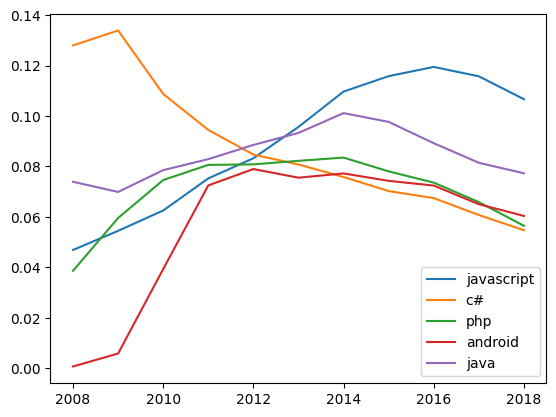

In [45]:
# Create Multiple line chart with matplotlib
tag_subset_set = set(by_tag_subset['tag'])

plt.figure()

for tag in tag_subset_set:
    selected_data = by_tag_subset.loc[by_tag_subset['tag'] == tag]
    plt.plot(selected_data['year'], selected_data['fraction'], label= tag)

plt.legend()
plt.show()

### Question 08 : Some more tags!

Wow, based on that graph we've seen a lot of changes in what programming languages are most asked about. C# gets fewer questions than it used to, and Python has grown quite impressively.

This Stack Overflow data is incredibly versatile. We can analyze any programming language, web framework, or tool where we'd like to see their change over time. Combined with the reproducibility of R and its libraries, we have ourselves a powerful method of uncovering insights about technology.

To demonstrate its versatility, let's check out how three big mobile operating systems (Android, iOS, and Windows Phone) have compared in popularity over time. But remember: this code can be modified simply by changing the tag names!

In [18]:
# filter data with OS name
os_tag = by_tag_year_fraction[by_tag_year_fraction['tag'].\
                isin(["android","ios", "windows-phone"])].\
                sort_values(['tag', 'year'])

os_tag

,year,tag,number,year_total,fraction
76,2008,android,38,58390,0.000651
2713,2009,android,1991,343868,0.005790
5866,2010,android,27280,694391,0.039286
9252,2011,android,86987,1200551,0.072456
12834,2012,android,129903,1645404,0.078949
16586,2013,android,155597,2060473,0.075515
20456,2014,android,167136,2164701,0.077210
24436,2015,android,164835,2219527,0.074266
28476,2016,android,161147,2226072,0.072391
32535,2017,android,149852,2305207,0.065006


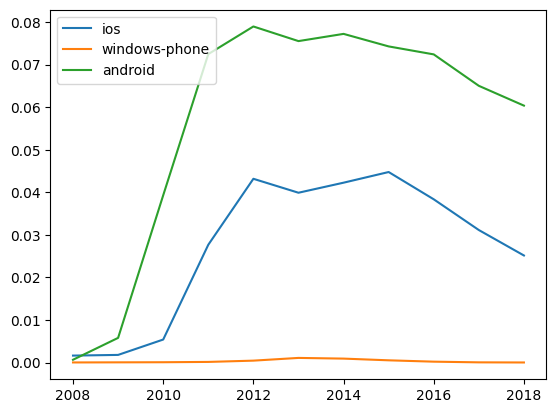

In [19]:
# Create OS multiple line chart
tag_set = set(os_tag['tag'])

plt.figure()

for tag in tag_set:
    selected_data = os_tag.loc[os_tag['tag'] == tag]
    plt.plot(selected_data['year'], selected_data['fraction'], label= tag)

plt.legend()
plt.show()